# 1. Load packages
## Install Package

In [1]:
!pip install Recursive_Symmetry_Aware_Materials_Microstructure_Explorer

## Import Packages

In [3]:
# Torchvision
import torchvision.transforms as transforms

# pytorch
import torch
from torch.utils.data import DataLoader, Dataset

# numpy
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

# Umap package
import umap.umap_ as umap

# timing package
import time

# Tools from this package
import Recursive_Symmetry_Aware_Materials_Microstructure_Explorer.util as util
import Recursive_Symmetry_Aware_Materials_Microstructure_Explorer.select_model as select_model
import Recursive_Symmetry_Aware_Materials_Microstructure_Explorer.viz.viz as viz

# 2. Downloading Images
Since this example is just a demo we will download images from google. We have selected a few materials catagories but you can use whatever catagories you like. You can also use your own images. 




In [4]:
# Folder where files will be downloaded
path = '../downloads/'

# Names of catagories to download
names = ['transmission electron microscopy', 'atomic force microscopy', 'optical microscopy', 'metals',
        'ceramics', 'polymers','semiconductors']


# function that scrapes images from google
util.image_scraping.download_images_from_google(names, path)


Item no.: 1 --> Item name = transmission electron microscopy
Evaluating...
Starting Download...
Image URL: https://www.ccber.ucsb.edu/sites/default/files/Electron_Microscope.jpg
Completed Image ====> 1.electron_microscope.jpg
Image URL: https://warwick.ac.uk/fac/sci/physics/current/postgraduate/regs/mpagswarwick/ex5/techniques/structural/tem/tem_ed.jpg
Completed Image ====> 2.tem_ed.jpg
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/STEM_fig.png/1200px-STEM_fig.png
Completed Image ====> 3.1200px-stem_fig.png
Image URL: https://cdn.britannica.com/90/113690-004-CB552E7F/Transmission-electron-microscope.jpg
Completed Image ====> 4.transmission-electron-microscope.jpg
Image URL: https://www.news-medical.net/image.axd?picture=TEM%20schwann%20cell%20-%20Jose%20Luis%20Calvo%20_thumb%5B8%5D_thumb.jpg
Completed Image ====> 5.image.axd.jpg
Image URL: https://www.biosciencenotes.com/wp-content/uploads/2018/06/TEM6.jpg
Completed Image ====> 6.tem6.jpg
Image URL: https://i.yt

Completed Image ====> 20.csm_modular_designed_microscopy_1cdb8982b5.jpg
Image URL: https://www.marketsandmarkets.com/Images/atomic-force-microscopy-market.jpg
Completed Image ====> 21.atomic-force-microscopy-market.jpg
Image URL: https://www.researchgate.net/publication/340866419/figure/fig1/AS:883463305588739@1587645474432/Schematic-illustration-of-conductive-atomic-force-microscopy-C-AFM-applications-in-two.png
Completed Image ====> 22.schematic-illustration-of-conductive-atomic-force-microscopy-c-afm-applications-in-two.png
Image URL: https://images.squarespace-cdn.com/content/v1/51acda21e4b0be9ceadc57b3/1401718806324-WLV1OI2RUX5TLYN6I2HO/ke17ZwdGBToddI8pDm48kBcwDWhvvoBK8In0fByU9A4UqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKccQG6t9HLRZ8DvV74GlaLykKuQkRoDRimQxG9G5hLqWFbqcBpFQCJZaS5OIJJgq-G/CellElasticityBasics2.png
Completed Image ====> 23.cellelasticitybasics2.png
Image URL: https://www.umass.edu/ials/sites/default/files/facilities/afm_3d_topo

Completed Image ====> 16.metal-bars-860x430.jpg
Image URL: https://www.snipsmag.com/ext/resources/SNIPS/2019/News/Metal-materials.jpg?1557572303
Completed Image ====> 17.metal-materials.jpg
Image URL: https://www.texasironandmetal.com/wp-content/uploads/2020/08/TIM_blog_metal_types.jpg
Completed Image ====> 18.tim_blog_metal_types.jpg
Image URL: https://www.mining.com/wp-content/uploads/2020/10/Screen-Shot-2020-10-02-at-2.45.26-PM.png
Completed Image ====> 19.screen-shot-2020-10-02-at-2.45.26-pm.png
Image URL: https://www.cmegroup.com/content/dam/cmegroup/education/images/articles/2019/industrial-metals-can-demand-meet-supply-challenge-940x600.jpg
Completed Image ====> 20.industrial-metals-can-demand-meet-supply-challenge-940x600.jpg
Image URL: https://www.sme.org/globalassets/sme.org/technologies/articles/2021/03---march/know-your-metals-aluminum-lead.jpg
Completed Image ====> 21.know-your-metals-aluminum-lead.jpg
Image URL: https://nextdaymetals.co.uk/wp-content/uploads/2019/09/metal

Completed Image ====> 7.160711_web.jpg
Image URL: https://d12oja0ew7x0i8.cloudfront.net/images/Article_Images/ImageForArticle_18335(1).jpg
Completed Image ====> 8.imageforarticle_18335(1).jpg
Image URL: https://scitechdaily.com/images/Polymer-Molecule-777x518.jpg
Completed Image ====> 9.polymer-molecule-777x518.jpg
Image URL: https://cdn.britannica.com/98/128798-050-1636D763/formation-nylon-polymer.jpg
Completed Image ====> 10.formation-nylon-polymer.jpg
Image URL: https://augustrs.com/wp-content/uploads/2020/02/Polymer-Chain_1.jpg
Completed Image ====> 11.polymer-chain_1.jpg
Image URL: https://www.polymersolutions.com/blog/wp-content/uploads/2016/05/120522_PolymerSolutionsInc_275.jpg
Completed Image ====> 12.120522_polymersolutionsinc_275.jpg
Image URL: https://www.thoughtco.com/thmb/qYGJxA9_Pp8mtMzX5G0K6qBBmY4=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/three-dimensional-model-of-polyvinyl-chloride-165874889-5c425ea7c9e77c000188be6d.jpg
Completed Image ====> 13.three-di

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Expecting value: line 1 column 1 (char 0)
Image objects data unpacking failed. Please leave a comment with the above error at https://github.com/hardikvasa/google-images-download/pull/298
Traceback (most recent call last):
  File "/Users/joshuaagar/opt/anaconda3/envs/josh/lib/python3.8/site-packages/Recursive_Symmetry_Aware_Materials_Microstructure_Explorer/util/google_images_download.py", line 304, in download_page
    return self._image_objects_from_pack(
  File "/Users/joshuaagar/opt/anaconda3/envs/josh/lib/python3.8/site-packages/Recursive_Symmetry_Aware_Materials_Microstructure_Explorer/util/google_images_download.py", line 263, in _image_objects_from_pack
    image_objects = json.loads(data)[31][0][12][2]
  File "/Users/joshuaagar/opt/anaconda3/envs/josh/lib/python3.8/json/__init__.py", line 357, in loads
    return _default_decoder.decode(s)
  File "/Users/joshuaagar/opt/anaconda3/envs/josh/lib/python3.8/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx

TypeError: object of type 'NoneType' has no len()

# 3. Collects and Collates Images

In [11]:
# collates files from folders does a recursive search through folders
images, dir_jpg, name_all, dir_name = util.image_collation.image_collection(path)

# 4. Featurizes the Images
## Preprocessing parameters

In [12]:
# Provides a tranformation for the neural network 
transform = transforms.Compose([
            # Resizes the image
            transforms.Resize((224,224)),
            
            # converts the image to a tensor
            transforms.ToTensor(),
    
            # Normalizes the image based on ImageNet which the model was trained on
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])

# Does standard tranformations to the image for visualization
viz_trans = transforms.Compose([
            # Resizes the image
            transforms.Resize((224,224)),
    
            # converts the image to a tensor
            transforms.ToTensor(),
            ])

# Sets the inference batch size
batch_size = 5

# Builds the dataset
cropped_dataset = util.image_collation.image_dataset(images=images, transform=transform, viz=viz_trans)

# Constructs the dataloader
train_dl = DataLoader(cropped_dataset, batch_size, shuffle=False, num_workers=0, pin_memory=True)

# Set the parameters and CUDA, CPU useage
# Make this into a function

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

# Parameters
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 6}

## Visualizes the Images

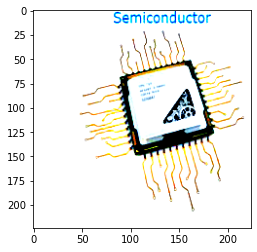

In [15]:
# Visualize a random input into the neural network
# Note the input into the neural network has been scaled
ind = np.random.randint(0,len(cropped_dataset))
plt.imshow(np.fliplr(np.rot90(torch.transpose(cropped_dataset.__getitem__(ind),0,2),k=3)))

## Conducts feature extraction

In [16]:
# Extracts features from model
# Options for different feature extractors
# vgg - vgg16 model imagenet
# resnet - symmetry aware resnet model
# both - vgg16 combined with with symmetry aware resnet model

features = select_model.select_model(train_dl, 5,
                                     images, model_type='vgg',
                                     N_EPOCHS=5)

Using cache found in /Users/joshuaagar/.cache/torch/hub/pytorch_vision_v0.6.0
39it [01:25,  2.20s/it]


# 5. Saves parameters for Bokeh Server

In [17]:
#Save the images data for UMAP plotting later

images =[]
for i in range(len(cropped_dataset)):
    images.append(torch.transpose(cropped_dataset.__getitemviz__(i),0,2).detach().numpy())

images = np.array(images)

np.save('Data_images.npy',images) #save images
np.save('Data_name_all.npy',name_all) # saves the files with the names
np.save('Data_activations.npy',features) #save activations

# 6. Run UMAP

In [18]:
# Calcualte UMAP activations


start = time.time()
print("Computing UMAP embedding")
np.random.seed(42)
X_umap = umap.UMAP(n_neighbors=5, min_dist=0.3,
                   n_components=2, metric='correlation').fit_transform(features)
    
# plot_embedding(X_umap, 1000, images, 
#                'UMAP embedding of' +' {} '.format(X_umap.shape[0]) +
#                 'images'+" (1000 images shown)")
#plt.savefig(filename, bbox_inches='tight', dpi=300)
# plot_embedding(X_umap, X_umap.shape[0], 10, images)    
stop = time.time() #end the timer
print(stop-start)

Computing UMAP embedding
6.331628084182739


# 7. Visualize UMAP

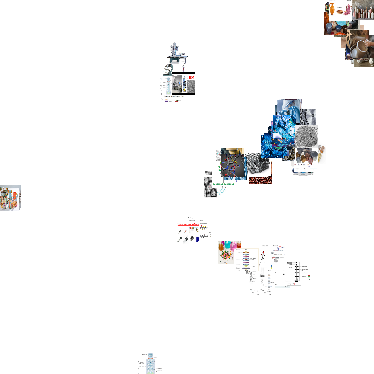

In [19]:
# Plot UMAP
viz.plot_embedding(X_umap, 100, 5, images*255)

In [20]:
#save UMAP activations
np.save('Data_umap.npy', X_umap) 